In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data_folder = "../../resource/"

In [32]:
show_gray= lambda x:plt.imshow(x, cmap='gray')

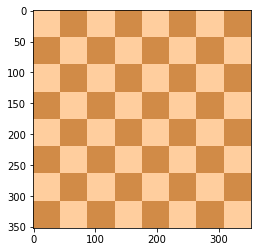

In [100]:
flat_chess_img = cv2.imread(f"{data_folder}/flat_chessboard.png")
flat_chess_img = cv2.cvtColor(flat_chess_img, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess_img)

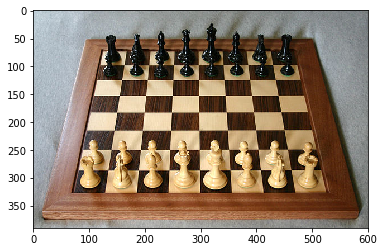

In [101]:
real_chess_img = cv2.imread(f"{data_folder}/real_chessboard.jpg")
real_chess_img = cv2.cvtColor(real_chess_img, 
                               cv2.COLOR_BGR2RGB)
# show_gray(gray_real_chess)
plt.imshow(real_chess_img)

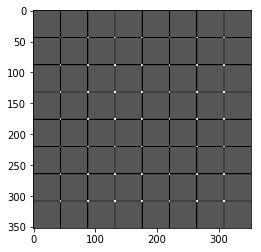

In [58]:
dst = cv2.cornerHarris(src=gray_flat_chess,
                      blockSize=2,
                      ksize=3,
                      k=0.04)
show_gray(dst)

in the below image after performaing corner haris
we will get white dots on the corner, so where ever 
there is a white pixel inside result of cornerHarris 
we will add red color to the same pixel in real image

In [102]:
def get_corner(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.float32(img_gray)
    dst = cv2.cornerHarris(src=img_gray,
                          blockSize=2,
                          ksize=3,
                          k=0.04)
    dst = cv2.dilate(dst, None)
    img[dst >0.01*dst.max()] = [255,0,0]
    return dst

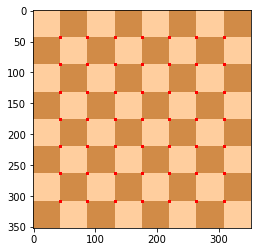

In [103]:
dst = get_corner(flat_chess_img)
plt.imshow(flat_chess_img)

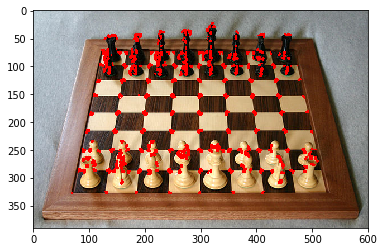

In [105]:
dst = get_corner(real_chess_img)
plt.imshow(dst, cmap='gray')
plt.imshow(real_chess_img)